##### Fernando Puebla Stein ####

<u> Importando as bibliotecas </u>



In [ ]:
%pip install numpy
%pip install matplotlib

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 1 - Juntar todas as imagens em uma so

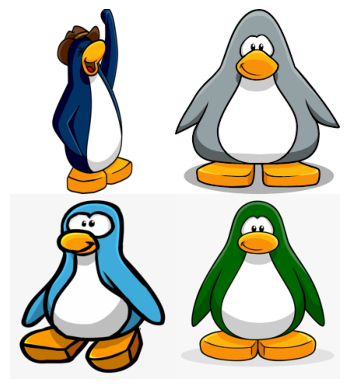

In [115]:

P1 = Image.open('/Users/Nando/Desktop/P1.png').convert('RGB') 
P2 = Image.open('/Users/Nando/Desktop/P2.png').convert('RGB')  
P3 = Image.open('/Users/Nando/Desktop/P3.jpg').convert('RGB')  
P4 = Image.open('/Users/Nando/Desktop/P4.png').convert('RGB')  

# Redimensionar as imagens para o menor tamanho comum
min_width = min(P1.width, P2.width, P3.width, P4.width)
min_height = min(P1.height, P2.height, P3.height, P4.height)

P1 = P1.resize((min_width, min_height))
P2 = P2.resize((min_width, min_height))
P3 = P3.resize((min_width, min_height))
P4 = P4.resize((min_width, min_height))

# Converter as imagens para arrays 
P1 = np.array(P1)
P2 = np.array(P2)
P3 = np.array(P3)
P4 = np.array(P4)

# Combinar as imagens em uma grade 2x2
linha1 = np.concatenate((P1, P2), axis=1)  # Concatenar P1 e P2 horizontalmente
linha2 = np.concatenate((P3, P4), axis=1)  # Concatenar P3 e P4 horizontalmente
imagem_combinada = np.concatenate((linha1, linha2), axis=0)  # Concatenar as duas linhas verticalmente


plt.imshow(imagem_combinada)
plt.axis('off') 
plt.show()


# 2 - MUDAR A COR DOS PINGUINS

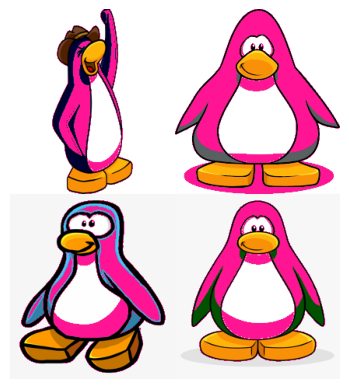

In [128]:

# Definir os limites das cores a serem alteradas (ciano, azul escuro, cinza, verde)
lower_ciano = np.array([63, 171, 218])      
upper_ciano = np.array([63, 171, 218])      

lower_azul = np.array([0, 0, 100])         
upper_azul = np.array([100, 100, 255])     

lower_cinza = np.array([100, 100, 100])    
upper_cinza = np.array([200, 200, 200])    

lower_verde = np.array([0, 100, 0])        
upper_verde = np.array([100, 255, 100])   

# Criar máscaras para cada cor
mask_ciano = ((imagem_combinada[:, :, 0] >= lower_ciano[0]) & (imagem_combinada[:, :, 1] >= lower_ciano[1]) & (imagem_combinada[:, :, 2] >= lower_ciano[2]) &
              (imagem_combinada[:, :, 0] <= upper_ciano[0]) & (imagem_combinada[:, :, 1] <= upper_ciano[1]) & (imagem_combinada[:, :, 2] <= upper_ciano[2]))

mask_azul = ((imagem_combinada[:, :, 0] >= lower_azul[0]) & (imagem_combinada[:, :, 1] >= lower_azul[1]) & (imagem_combinada[:, :, 2] >= lower_azul[2]) &
             (imagem_combinada[:, :, 0] <= upper_azul[0]) & (imagem_combinada[:, :, 1] <= upper_azul[1]) & (imagem_combinada[:, :, 2] <= upper_azul[2]))

mask_cinza = ((imagem_combinada[:, :, 0] >= lower_cinza[0]) & (imagem_combinada[:, :, 1] >= lower_cinza[1]) & (imagem_combinada[:, :, 2] >= lower_cinza[2]) &
              (imagem_combinada[:, :, 0] <= upper_cinza[0]) & (imagem_combinada[:, :, 1] <= upper_cinza[1]) & (imagem_combinada[:, :, 2] <= upper_cinza[2]))

mask_verde = ((imagem_combinada[:, :, 0] >= lower_verde[0]) & (imagem_combinada[:, :, 1] >= lower_verde[1]) & (imagem_combinada[:, :, 2] >= lower_verde[2]) &
              (imagem_combinada[:, :, 0] <= upper_verde[0]) & (imagem_combinada[:, :, 1] <= upper_verde[1]) & (imagem_combinada[:, :, 2] <= upper_verde[2]))

# Definir a cor rosa 
rosa = np.array([255, 20, 147])

# Aplicar a nova cor nas áreas das máscaras
imagem_combinada[mask_ciano] = rosa
imagem_combinada[mask_azul] = rosa
imagem_combinada[mask_cinza] = rosa
imagem_combinada[mask_verde] = rosa

plt.imshow(imagem_combinada)
plt.axis('off') 
plt.show()


Este trecho de código utiliza técnicas de processamento de imagem identificar e alterar cores específicas presentes nos pinguins. Ele define limites de cor para ciano, azul escuro, cinza e verde, cria máscaras booleanas para identificar pixels que correspondem a essas cores e substitui esses pixels pela cor rosa.






# 3 - ESPELHAR A IMAGEM

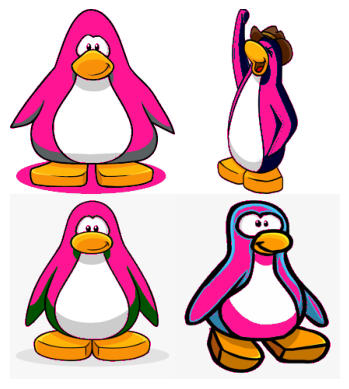

In [125]:
# Reflexão em y
l, c, _ = imagem_combinada.shape  
pinguim_refl = np.zeros(shape=imagem_combinada.shape, dtype=np.uint8)

for i in range(l):
    for j in range(c):
        new_x = c - 1 - j  
        new_y = i
        pinguim_refl[new_y, new_x] = imagem_combinada[i, j]

# Exibir a imagem refletida
plt.imshow(pinguim_refl)
plt.axis('off')  
plt.show()


# 4 - RECORTAR SEU PINGUIM FAVORITO

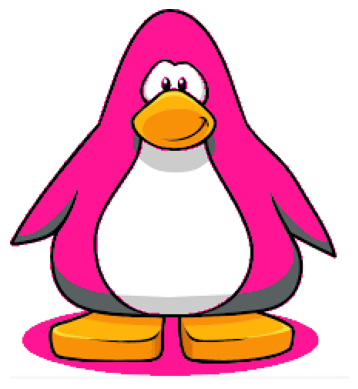

In [124]:
# Definir as coordenadas do recorte
x_inicio, y_inicio = 0, 0  
largura, altura = 220, 240  

# Realizar o recorte
recorte_pinguim_refl = pinguim_refl[y_inicio:y_inicio + altura, x_inicio:x_inicio + largura]

plt.imshow(recorte_pinguim_refl)
plt.axis('off') 
plt.show()

# 5 -  FAZER UMA ANALISE DE HISTOGRAMA EM SEU PINGUIM FAVORITO E ESCOLHER UM VALOR DE THRESHOLD

In [ ]:
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])  # Canal vermelho
    histogram_g = histogram_gray(img[:, :, 1])  # Canal verde
    histogram_b = histogram_gray(img[:, :, 2])  # Canal azul
    
    plt.figure(figsize=(16, 16))
    
    plt.subplot(2, 1, 1)
    plt.imshow(img)
    plt.axis('off') 
    
    # Mostrar os histogramas para cada canal de cor
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red', alpha=0.5, label='Vermelho')  # Histograma do canal vermelho
    plt.bar(range(256), histogram_g, color='green', alpha=0.5, label='Verde')  # Histograma do canal verde
    plt.bar(range(256), histogram_b, color='blue', alpha=0.5, label='Azul')  # Histograma do canal azul
    plt.legend(loc='upper right')  # Adicionar legenda
    plt.title("Histogramas dos Canais de Cor")
    plt.ylabel("Número de Pixels")
    plt.xlim([0, 255])  
    plt.show()


show_histogram(recorte_pinguim_refl)  



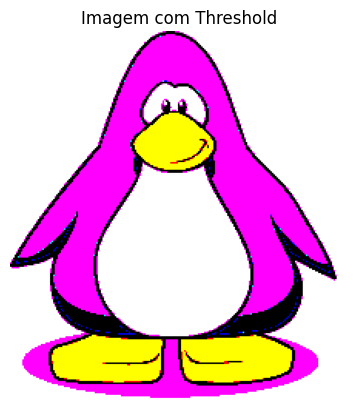

In [120]:
# Definir um valor de threshold
threshold_value = 102 

# Função para aplicar threshold em uma imagem colorida
def apply_threshold(img, threshold):
   
    binary_img = np.zeros(img.shape, dtype=np.uint8)

    
    for channel in range(3):
        binary_img[..., channel] = np.where(img[..., channel] > threshold, 255, 0)

    return binary_img

# Aplicar o threshold à imagem do pinguim refletido e recortado
threshold_pinguim_refl = apply_threshold(recorte_pinguim_refl, threshold_value)


plt.imshow(threshold_pinguim_refl)
plt.axis('off') 
plt.title("Imagem com Threshold")
plt.show()


Escolhi o **threshold de 102** pois se a imagem original contiver uma gama de cores onde tons mais escuros são mais fortes, esse valor pode realçar esses tons. E assim tirando algumas sombras que tinha ficado no pinguim.



# 6 - APLICAR UMA CONVERSAO PARA QUE TODOS OS PIXEIS ABAIXO DELE SEJAM PINTADOS

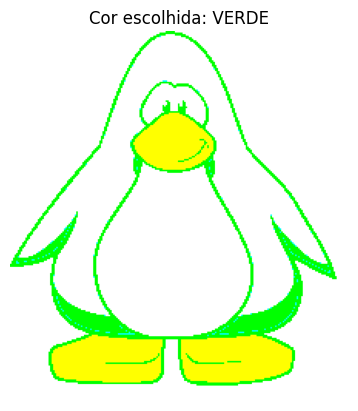

In [145]:

verde_rgb = [0, 255, 0]  

# Aplicar o threshold com a cor verde à imagem do pinguim refletido e recortado
threshold_pinguim_refl = apply_threshold_with_color(recorte_pinguim_refl, threshold_value, verde_rgb)

plt.imshow(threshold_pinguim_refl)
plt.axis('off')  
plt.title("Cor escolhida: VERDE")
plt.show()
